In [1]:
import cv2 as cv
import numpy as np

from core.text_detection import DB_text_detection
from core.text_detection import EAST_text_detection
from config.config_helpers import Config

from utils.image_utils.Image import Image_preprocessing
from utils.image_utils.Image import showImage

image_path = f"data\\tx.png"
json_config = Config(f"config\\config.json")
DB_model_path = f"models\\{json_config.get('image.DB_detection_model')}"
EAST_model_path = f"models\\{json_config.get('image.EAST_detection_model')}"

image = cv.imread(image_path)
frame = Image_preprocessing(image, json_config.get('image.scaling_factor'))
DB_frame = DB_text_detection(frame._cvImage, DB_model_path)
EAST_frame = EAST_text_detection(frame._cvImage, EAST_model_path)

AttributeError: 'Image_preprocessing' object has no attribute '_cvImage'

2
[0.95245314 0.9441875  0.94820327 0.93699914 0.93258834]


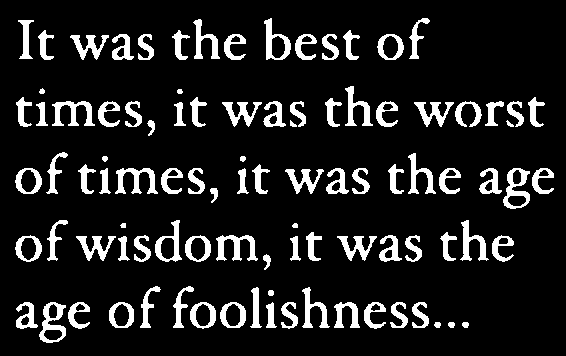

In [ ]:
print(json_config.get('image.scaling_factor'))
print(DB_frame._confidence)
showImage(frame._cvImage)

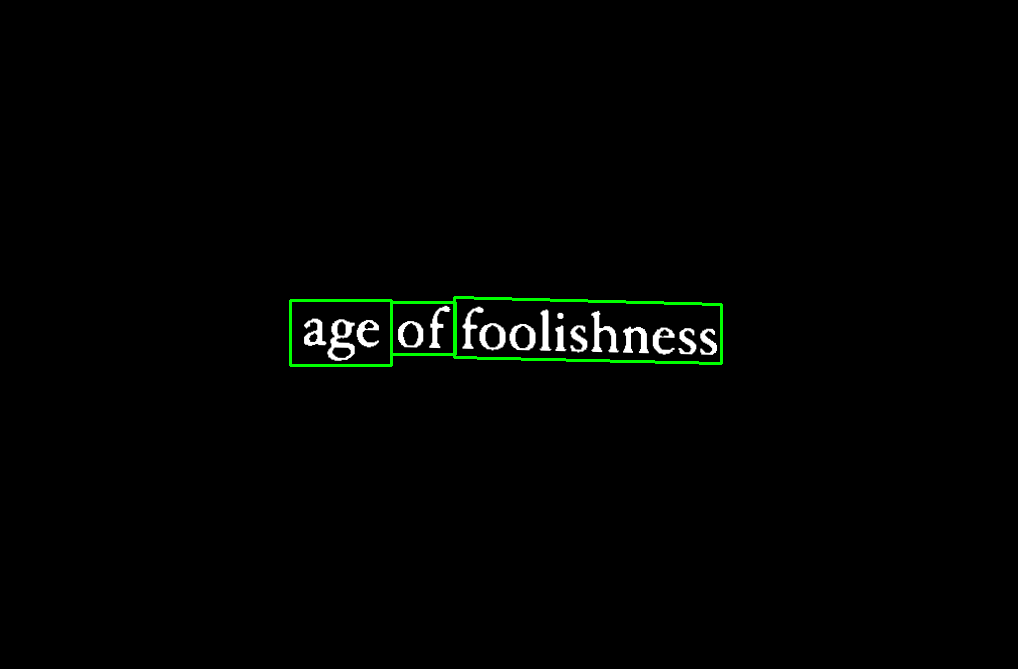

In [ ]:
from utils.image_utils.warp_image_crop import sort_boxes
from utils.image_utils.warp_image_crop import crop_image

boxes, confidences = sort_boxes(DB_frame._boxes, DB_frame._confidence)
croppedLineImage = crop_image(DB_frame._cvImage, boxes)

model_path = f"models\\DB_IC15_resnet18.onnx"
croppedWord = DB_text_detection(croppedLineImage[4], model_path, padding=300)

showImage(croppedWord._bound_image)

cv.cvt

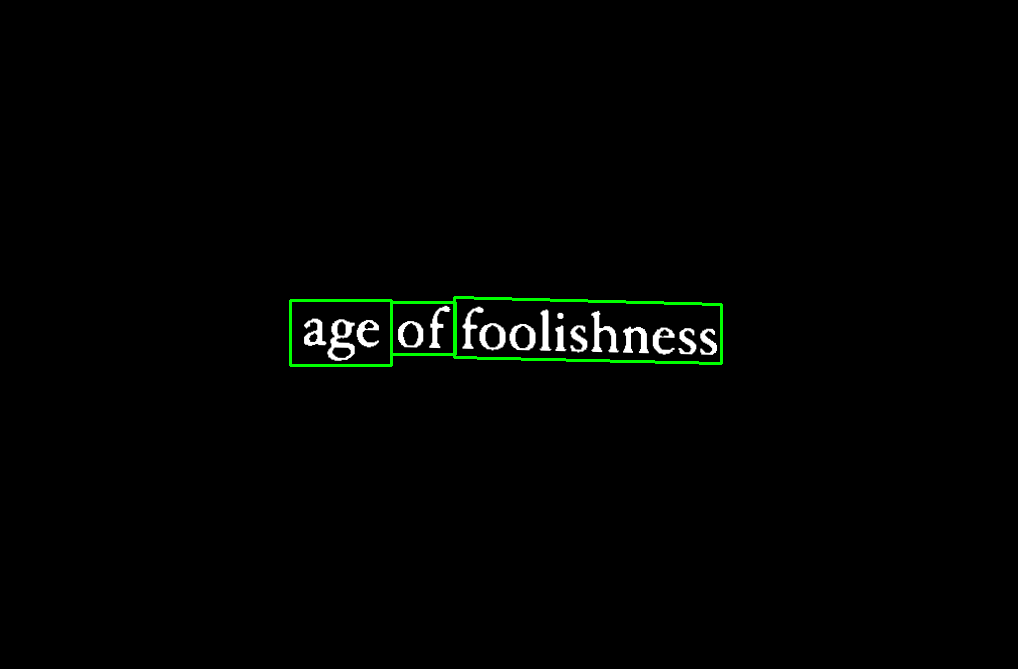

In [ ]:
from utils.image_utils import warp_image_crop

boxes, confidences = warp_image_crop.sort_boxes(DB_frame._boxes, DB_frame._confidence)
croppedLineImage = warp_image_crop.crop_image(DB_frame._cvImage, boxes)

model_path = f"models\\DB_IC15_resnet18.onnx"
croppedWord = DB_text_detection(croppedLineImage[4], model_path, padding=300)

showImage(croppedWord._bound_image)

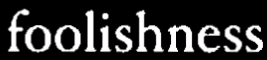

In [ ]:
boxes, confidences = sort_boxes(croppedWord._boxes, croppedWord._confidence, sort_by='x')
croppedWordImage = crop_image(croppedWord._cvImage, boxes)
wordImage = crop_image(croppedWord._cvImage, boxes)

showImage(wordImage[2])

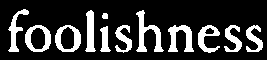

In [ ]:
image = wordImage[2]
rgb_image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
gray = cv.cvtColor(rgb_image, cv.COLOR_BGR2GRAY)

# ret, thresh = cv.threshold(rgb_image, 0, 255, cv.THRESH_BINARY)
ret,thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

letters = []
for idx, contour in enumerate(contours):
    (x, y, w, h) = cv.boundingRect(contour)
    letter_crop = thresh[y:y + h, x:x + w]
    letters.append(letter_crop)
    cv.rectangle(rgb_image, (x,y), (x + w, y + h), (0,0,255))

showImage(thresh)

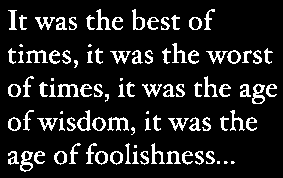

In [ ]:
showImage(thresh)

In [ ]:
# # splitting line bounding boxes to cropped word

# croppedWordImage = []
# model_path = f"models\\DB_IC15_resnet18.onnx"

# for i in range(len(croppedLineImage)):

#     croppedWord = DB_text_detection(croppedLineImage[i], model_path, padding='precentage')

#     boxes, confidences = sort_boxes(croppedWord._boxes, croppedWord._confidence, sort_by='x')
#     wordImage = crop_image(croppedWord._cvImage, boxes)


#     croppedWordImage.append(wordImage)

In [ ]:
# showImage(croppedWordImage[0][1])
# image = croppedWordImage[4][2]
# showImage(image)

In [ ]:
# rgb_image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

# ret, thresh = cv.threshold(rgb_image, 127, 255, cv.THRESH_BINARY)
# contours, _ = cv.findContours(frame._cvImage, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# letters = []
# for idx, contour in enumerate(contours):
#     (x, y, w, h) = cv.boundingRect(contour)
#     # letter_crop = gray[y:y + h, x:x + w]
#     # letters.append(letter_crop)
#     cv.rectangle(rgb_image, (x,y), (x + w, y + h), (0,0,255))

# showImage(thresh)

In [ ]:
# rgb_image = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)

# contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# letters = []
# for idx, contour in enumerate(contours):
#     (x, y, w, h) = cv.boundingRect(contour)
#     # letter_crop = gray[y:y + h, x:x + w]       
#     # letters.append(letter_crop)
#     cv.rectangle(rgb_image, (x,y), (x + w, y + h), (0,0,255))

# showImage(rgb_image)

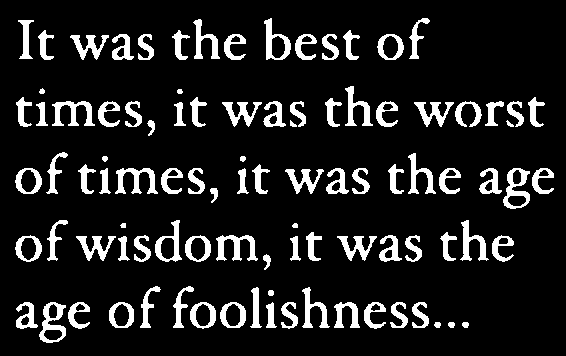

In [ ]:
showImage(frame._cvImage)

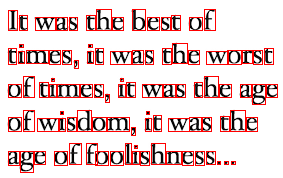

In [ ]:
image = cv.imread(f"data\\tx.png")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 190, 255, cv.THRESH_BINARY_INV)

contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

letters = []
for idx, contour in enumerate(contours):
    (x, y, w, h) = cv.boundingRect(contour)
    letter_crop = gray[y:y + h, x:x + w]       
    letters.append(letter_crop)
    cv.rectangle(image, (x,y), (x + w, y + h), (0,0,255))

showImage(image)

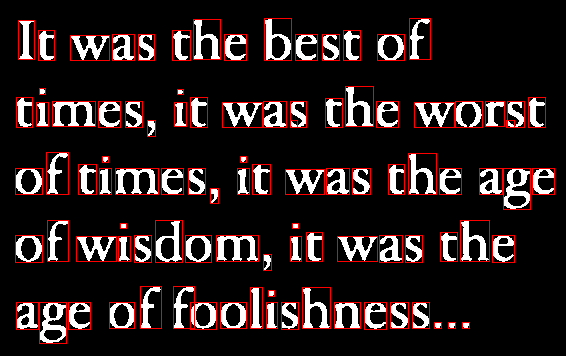

In [ ]:
image = cv.imread(f"data\\tx.png")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 190, 255, cv.THRESH_BINARY_INV)

rgb_image = cv.cvtColor(frame._cvImage, cv.COLOR_GRAY2BGR)
contours, _ = cv.findContours(frame._cvImage, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)


letters = []
for idx, contour in enumerate(contours):
    (x, y, w, h) = cv.boundingRect(contour)
    # letter_crop = gray[y:y + h, x:x + w]
    # letters.append(letter_crop)
    cv.rectangle(rgb_image, (x,y), (x + w, y + h), (0,0,255))

showImage(rgb_image)

In [ ]:
# from core.char_segmentation import char_segmentation

# char_image = char_segmentation(image, method='CCA_dilation')
# boxes = sort_boxes(char_image._coords, sort_by='x')

# croppedCharImage = crop_image(char_image._norm_cvImage, boxes)

In [ ]:
# showImage(char_image._cvImage)

In [ ]:
image = char_image._cvImage
rgb_image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)


# Menggunakan Connected Components untuk menemukan komponen yang terhubung
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(image, connectivity=8)

# Loop untuk menandai setiap komponen yang terdeteksi
for i in range(1, num_labels):  # Mulai dari 1, karena 0 adalah background
    x, y, w, h, area = stats[i]

    # Menghindari komponen kecil yang kemungkinan noise
    if w > 10 and h > 10:
        # Ekstraksi karakter dari gambar biner berdasarkan bounding box
        # karakter = image[y:y+h, x:x+w]
        
        cv.rectangle(rgb_image, (x, y), (x + w, y + h), (0, 255, 0), 1)

showImage(rgb_image)

NameError: name 'char_image' is not defined

In [ ]:
# splitting line bounding boxes to cropped char for model fit

val = []
model_path = f"models\\DB_IC15_resnet18.onnx"

for i in range(len(croppedLineImage)):
    word_array = []

    croppedWord = DB_text_detection(croppedLineImage[i], model_path, padding='precentage')

    boxes, confidences = sort_boxes(croppedWord._boxes, croppedWord._confidence, sort_by='x')
    wordImage = crop_image(croppedWord._cvImage, boxes)
    
    for j in wordImage:
        char_image = char_segmentation(j)
        boxes = sort_boxes(char_image._coords, sort_by='x')

        croppedCharImage = crop_image(char_image._norm_cvImage, boxes)
        word_array.append(croppedCharImage)

    val.append(word_array)

In [ ]:
# image = cv.imread('skew.png')

# gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# gray = cv.bitwise_not(gray)

In [ ]:
# image = Image_preprocessing('skew.png')
# DB_frame = DB_text_detection(image._cvImage, DB_model_path)

# boxes, confidences = sort_boxes(DB_frame._boxes, DB_frame._confidence)
# croppedLineImage = crop_image(DB_frame._cvImage, boxes)

# showImage(croppedLineImage[0])
# showImage(DB_frame._bound_image)
# # showImage(croppedLineImage[5])

In [ ]:
# val = []
# model_path = f"models\\DB_IC15_resnet18.onnx"

# for i in range(len(croppedLineImage)):
#     word_array = []

#     croppedWord = DB_text_detection(croppedLineImage[i], model_path, padding='precentage')

#     boxes, confidences = sort_boxes(croppedWord._boxes, croppedWord._confidence, sort_by='x')
#     wordImage = crop_image(croppedWord._cvImage, boxes)
    
#     for j in wordImage:
#         char_image = char_segmentation(j)
#         boxes = sort_boxes(char_image._coords, sort_by='x')

#         croppedCharImage = crop_image(char_image._norm_cvImage, boxes)
#         word_array.append(croppedCharImage)

#     val.append(word_array)

In [ ]:
import cv2
import numpy as np

# Membaca gambar
image = cv2.imread(f"data\\tx.png")

# Membuat mask hitam
mask = np.zeros(image.shape[:2], dtype="uint8")

# Definisikan koordinat poligon (contoh segitiga)
pts = np.array([[100, 100], [200, 50], [300, 300]], np.int32)
pts = pts.reshape((-1, 1, 2))

# Menggambar poligon putih pada mask
cv2.fillPoly(mask, [pts], 255)

# Aplikasikan mask ke gambar asli
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Menampilkan gambar asli dan hasil cropping dengan poligon
cv2.imshow('Original Image', image)
cv2.imshow('Masked Image (Polygon Cropping)', masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
